CREDIT CARD FRAUD DETECTION BY VISHAL

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [11]:
#printing first few rows of the data
df=pd.read_csv('.\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


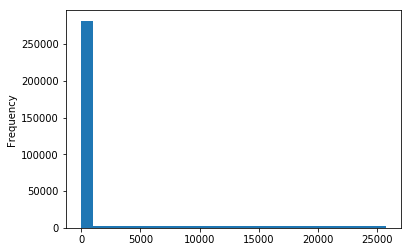

In [12]:
plt.hist(df['Amount'],bins=[0,1000,df['Amount'].max()])
plt.ylabel('Frequency')
plt.show()
#Majority of amounts<1000

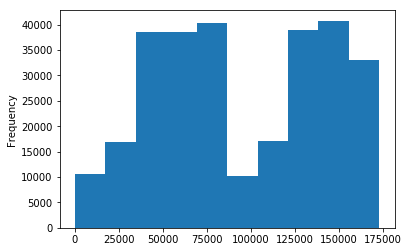

In [5]:
plt.hist(df['Time'])
plt.ylabel('Frequency')
plt.show()

The above graph shows that the number of transaction is low between certain points of time.
It could be that the transactions happening in that time are fraudulent.

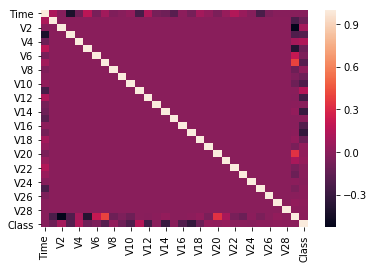

In [6]:
#plotting the heat map to visualise the correlations
sns.heatmap(df.corr())

In [7]:
counts = df['Class'].value_counts().to_dict()
print(counts)
#We realize that the dataset is highly skewed

{0: 284315, 1: 492}


In [13]:
#Normalizing amount
m=df['Amount'].mean();
s=df['Amount'].std();
df['Amount']=((df['Amount']-m)/(s))

In [14]:
#Normalizing Time
m=df['Time'].mean();
s=df['Time'].std();
df['Time']=((df['Time']-m)/(s))

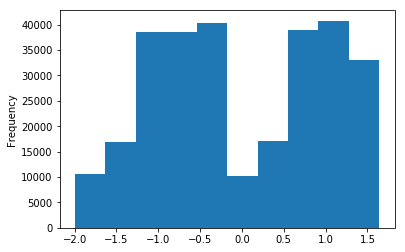

In [10]:
plt.hist(df['Time'])
plt.ylabel('Frequency')
plt.show()

In [8]:
X=df.iloc[:,0:30]
y=df['Class']
print(X.shape)

(284807, 30)


In [9]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


# Train the model using 'fit' method
model.fit(X_train, y_train)

# Test the model using 'predict' method
y_pred = model.predict(X_test)

# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.91      0.62      0.74       103

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.96      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



Let us check whether it actually works with the said recall values by having X_test having labels as all 1



In [ ]:
#obtaining the list of row numbers of all rows having Class value 11(fraud)
count = 0
listo=[]
print(type(listof1))
x_test=pd.DataFrame()
for i in range(284000):
    if df.iloc[i]['Class']==1:
        listo.append(i)
        count=count+1
print(x_test)

In [65]:
x_test=df.iloc[listo]
x_test=x_test.drop('Class',axis=1)
Y_test=df.iloc[listo]['Class']
print(x_test)
print(Y_test)

           Time         V1         V2         V3        V4         V5  \
541   -1.988030  -2.312227   1.951992  -1.609851  3.997906  -0.522188   
623   -1.986640  -3.043541  -3.157307   1.088463  2.288644   1.359805   
4920  -1.902619  -2.303350   1.759247  -0.359745  2.330243  -0.821628   
6108  -1.849469  -4.397974   1.358367  -2.592844  2.679787  -1.128131   
6329  -1.838245   1.234235   3.019740  -4.304597  4.732795   3.624201   
6331  -1.838098   0.008430   4.137837  -6.240697  6.675732   0.768307   
6334  -1.837908   0.026779   4.132464  -6.560600  6.348557   1.329666   
6336  -1.837740   0.329594   3.712889  -5.775935  6.078266   1.667359   
6338  -1.837571   0.316459   3.809076  -5.615159  6.047445   1.554026   
6427  -1.836329   0.725646   2.300894  -5.329976  4.007683  -1.730411   
6446  -1.835023   0.702710   2.426433  -5.234513  4.416661  -2.170806   
6472  -1.833591   1.023874   2.001485  -4.769752  3.819195  -1.271754   
6529  -1.830412  -1.585505   3.261585  -4.137422  2

In [66]:
y_pred = model.predict(x_test)
# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.70      0.82        93

   micro avg       0.70      0.70      0.70        93
   macro avg       0.50      0.35      0.41        93
weighted avg       1.00      0.70      0.82        93



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


We see that the recall values are pretty low because of the skewed training data.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel=KNeighborsClassifier(n_neighbors=2)
knnmodel.fit(X_train,y_train)
y_pred = knnmodel.predict(X_test)


In [79]:
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.96      0.80      0.87       103

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



So we can see a vastly improved f1 score for this model using the same train and test data compared to Logistic regression. Although we cant visualise 30 dimensions it could be possible that there is some pattern in these fraud cases if we use the root mean square distance parameter to calculate the cost.

In [80]:
y_pred = model.predict(x_test)
# Print the classification report 

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97        93

   micro avg       0.94      0.94      0.94        93
   macro avg       0.50      0.47      0.48        93
weighted avg       1.00      0.94      0.97        93



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


We have 94% rate of predicting a fraud case when it actually is, using this KNN model. Let us now try to train it dropping the skewed 'Amount' column

In [82]:
X_train.drop('Amount',axis=1)
X_test.drop('Amount',axis=1)
knnmodel2=KNeighborsClassifier(n_neighbors=2)
knnmodel2.fit(X_train,y_train)
y_pred = knnmodel2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.96      0.80      0.87       103

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
RFmodel = RandomForestClassifier(n_estimators=10)

In [19]:
RFmodel.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
y_pred = RFmodel.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.94      0.80      0.86       103

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



CONCLUSION: KNN model has the best F1 score and should be used, below is the code for training and testsing ONLY the knn model:-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#printing first few rows of the data
df=pd.read_csv('.\creditcard.csv')
df.head()

#Normalizing amount
m=df['Amount'].mean();
s=df['Amount'].std();
df['Amount']=((df['Amount']-m)/(s))

#Normalizing Time
m=df['Time'].mean();
s=df['Time'].std();
df['Time']=((df['Time']-m)/(s))

#separating the label and the features in the data and storing them in X and y separately
X=df.iloc[:,0:30]
y=df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

knnmodel=KNeighborsClassifier(n_neighbors=2)
knnmodel.fit(X_train,y_train)

y_pred = knnmodel.predict(X_test)

# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.96      0.80      0.87       103

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

